分割线
---
---

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tf.__version__,tf.keras.__version__,tf.test.is_gpu_available()

('2.0.0-beta1', '2.2.4-tf', True)

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28,28,1).astype('float32') /255
x_test = x_test.reshape(-1, 28,28,1).astype('float32') /255

11493376/11490434 [==============================] - 12s 1us/step


In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


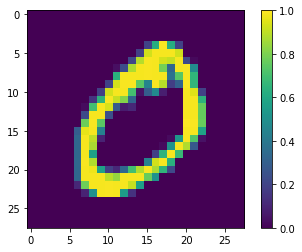

In [6]:
plt.figure()
plt.imshow(x_train[1].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

Model: "mnist model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               

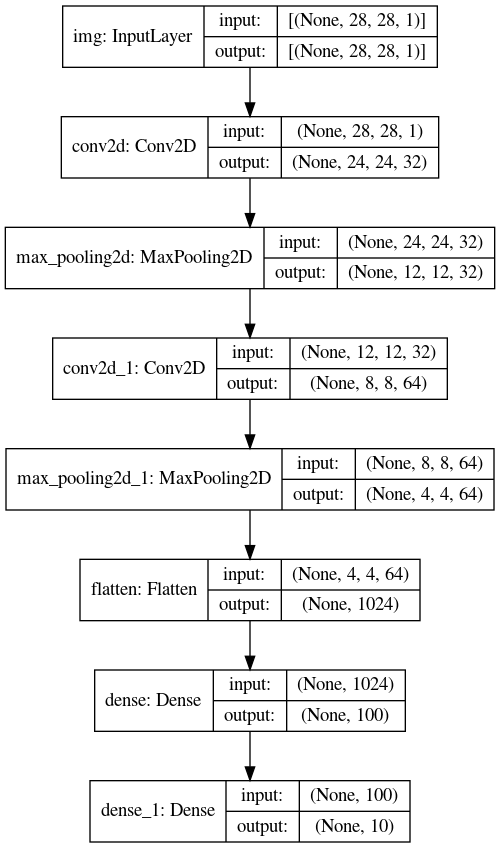

In [7]:
try:
    del model
except:
    0
inputs = tf.keras.Input(shape=(28, 28, 1), name='img')
h1 = layers.Conv2D(32, 5, activation='relu',padding='valid',kernel_initializer='uniform')(inputs)
h1 = layers.MaxPool2D(2)(h1)
h1 = layers.Conv2D(64, 5, activation='relu',padding='valid',kernel_initializer='uniform')(h1)
h1 = layers.MaxPool2D(2)(h1)
h1 = layers.Flatten()(h1)
h2 = layers.Dense(100,activation='relu')(h1)
#h2 = layers.GlobalMaxPool2D()(h1)
outputs = layers.Dense(10, activation='softmax')(h2)
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist model')
model.summary()
keras.utils.plot_model(model, 'multi_model.png', show_shapes=True)

In [9]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy', # 直接填api，后面会报错
             metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', test_scores[0])
print('test acc:', test_scores[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 77us/sample - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.0353 - val_accuracy: 0.9904
Epoch 2/5
48000/48000 [==============================] - 3s 73us/sample - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0413 - val_accuracy: 0.9899
Epoch 3/5
48000/48000 [==============================] - 4s 73us/sample - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0469 - val_accuracy: 0.9900
Epoch 4/5
48000/48000 [==============================] - 4s 73us/sample - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.0394 - val_accuracy: 0.9918
Epoch 5/5
48000/48000 [==============================] - 4s 73us/sample - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0493 - val_accuracy: 0.9902
test loss: 0.04161448390241749
test acc: 0.9918


In [9]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 192us/sample - loss: 0.0255 - accuracy: 0.9930


[0.025505001982916293, 0.993]

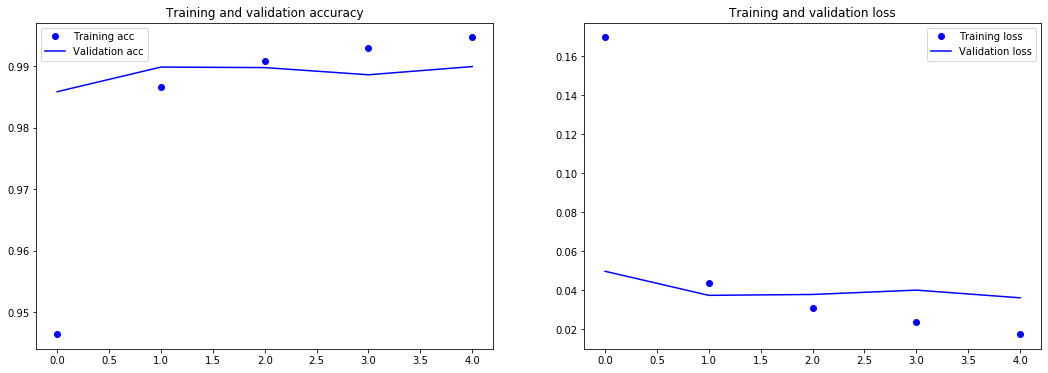

In [10]:
def plot_histroy(history):
    plt.figure(figsize=(18,6))
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    plt.subplot(121)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_histroy(history)

In [12]:
predictions = model.predict(x_test)
print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[0])

[1.0700125e-11 1.7501572e-10 8.5392635e-09 3.9163139e-09 9.0300510e-13
 1.4323085e-13 4.2865460e-16 9.9999928e-01 1.0929751e-10 7.5385049e-07]
7
7


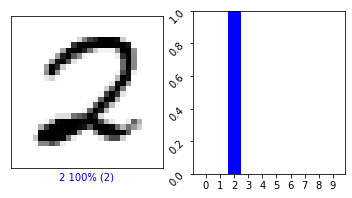

In [13]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.yticks(rotation=45)
    plt.xticks(range(10)) 
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
def plot_all(num_rows,num_cols,model,x_test,y_test):
    num_images = num_rows*num_cols
    npredictions = model.predict(x_test)
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, npredictions, y_test, x_test.reshape(-1,28,28))
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, npredictions, y_test)
        
i = 35
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

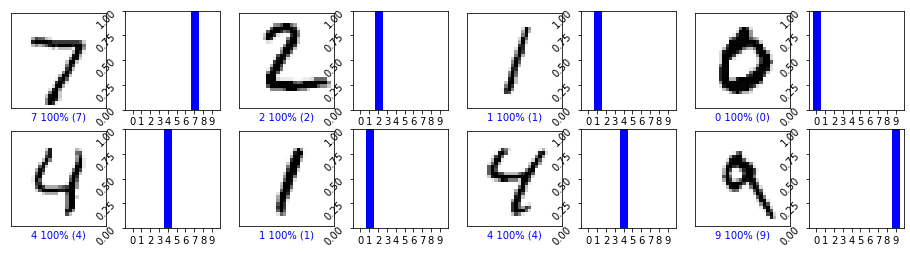

In [14]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
plot_all(2,4,model,x_test,y_test)

(1, 28, 28, 1)
[[1.0700125e-11 1.7501606e-10 8.5392635e-09 3.9163064e-09 9.0300331e-13
  1.4323085e-13 4.2865460e-16 9.9999928e-01 1.0929751e-10 7.5385049e-07]]


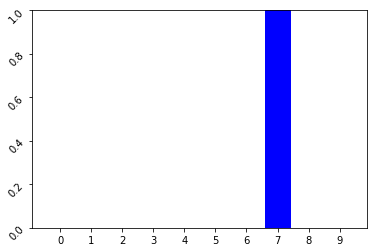

In [15]:
img = x_test.reshape(-1,28,28)[0]

img = (np.expand_dims(img,0))
img = (np.expand_dims(img,3))
print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(10), range(10))

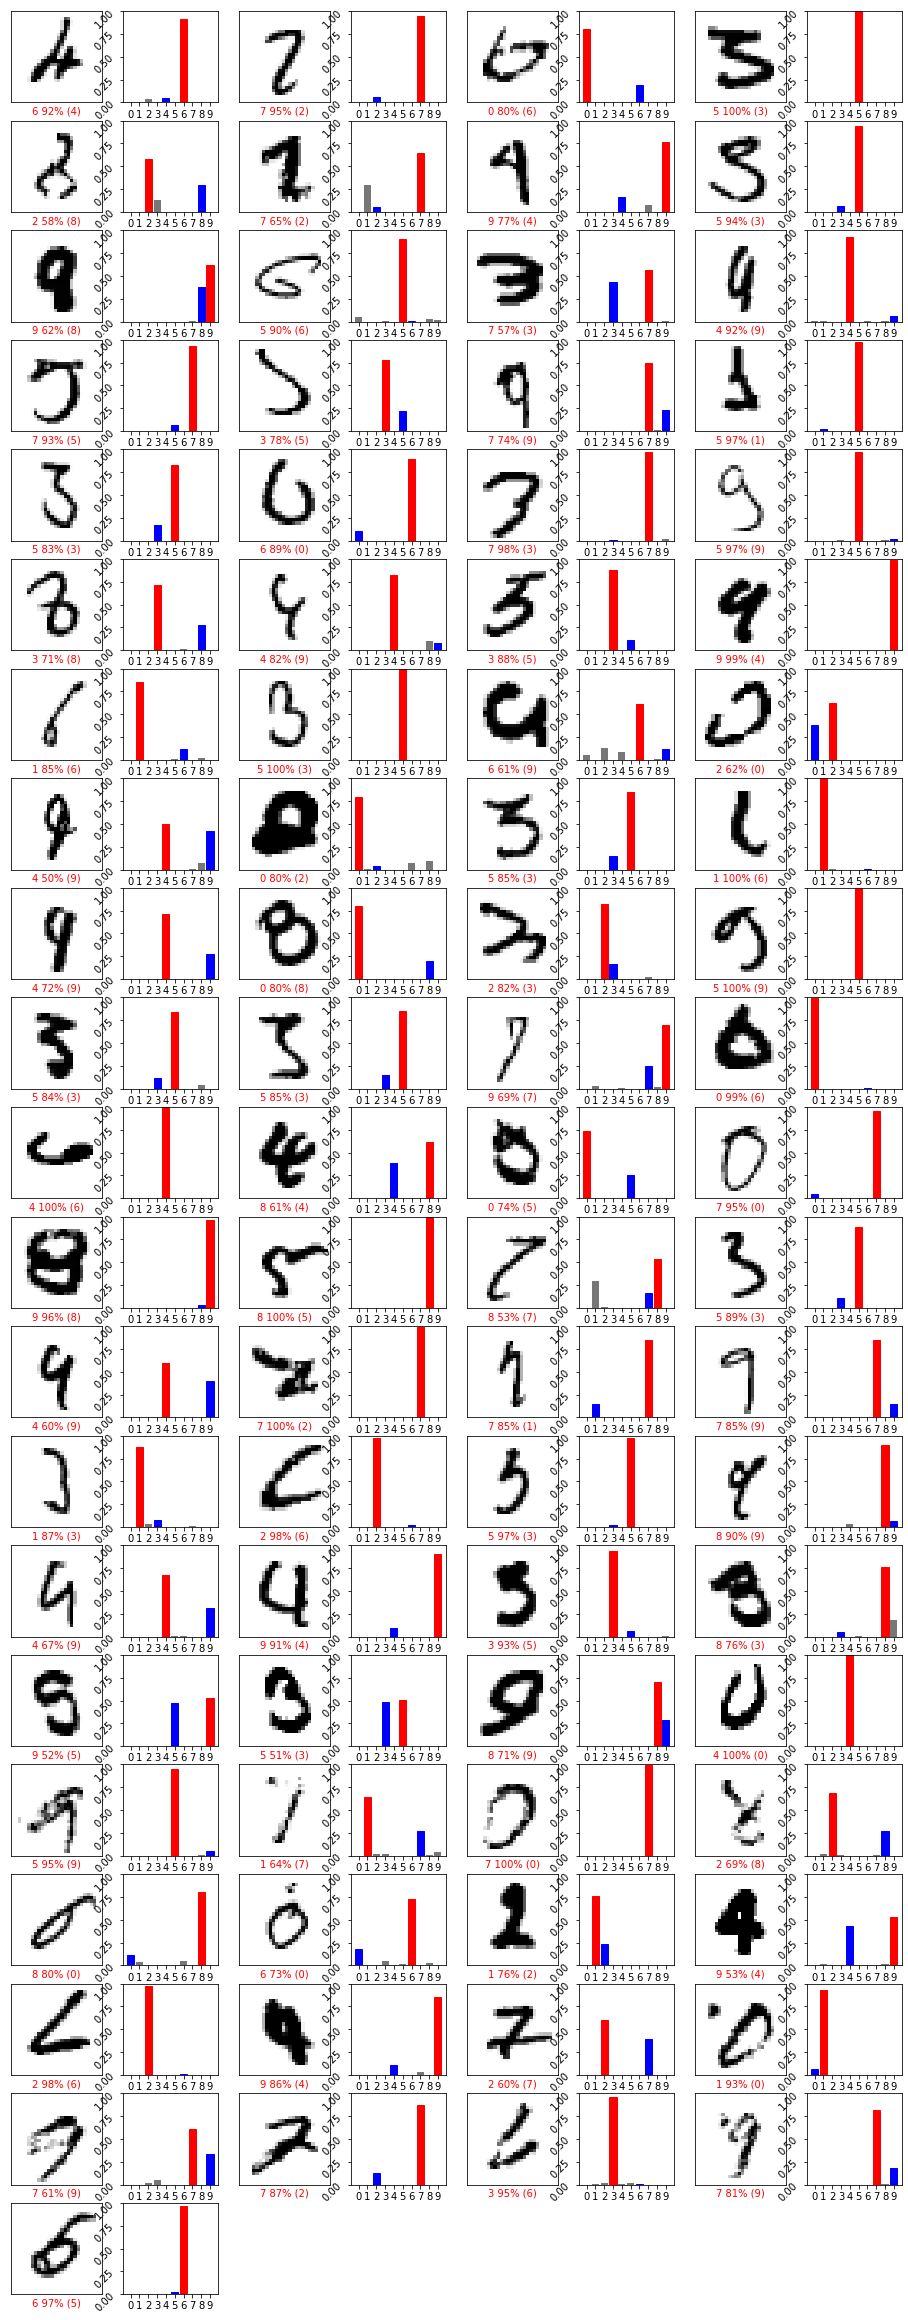

In [149]:
predicted_label = np.argmax(predictions,axis=1)
wrong_prediction_idx = np.argwhere(np.logical_not(y_test == predicted_label)).reshape(-1)
num_rows = np.ceil(wrong_prediction_idx.shape[0]/4)
num_cols = 4
num_images = wrong_prediction_idx.shape[0]
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(wrong_prediction_idx[i], predictions, y_test, x_test.reshape(-1,28,28))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(wrong_prediction_idx[i], predictions, y_test)
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix 
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float')    # 归一化
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

[[ 0  1  1  0  1  0  2  2  1  0]
 [ 0  0  0  0  0  1  0  1  0  0]
 [ 1  1  0  0  0  0  0  4  0  0]
 [ 0  1  1  0  0 10  0  2  1  0]
 [ 0  0  0  0  0  0  1  0  1  5]
 [ 1  0  0  3  0  0  1  1  1  1]
 [ 2  2  2  1  1  1  0  0  0  0]
 [ 0  1  1  0  0  0  0  0  1  1]
 [ 1  0  2  1  0  0  0  0  0  2]
 [ 0  0  0  0  6  3  1  4  2  0]]


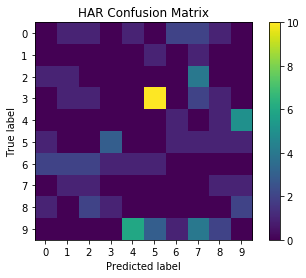

In [150]:
y_pred = np.argmax(predictions,axis=1)
cm = confusion_matrix(y_test[wrong_prediction_idx], y_pred[wrong_prediction_idx],)
plot_confusion_matrix(cm, range(10), "HAR Confusion Matrix")
print(cm)

分割线
---
---

In [10]:
from sklearn import model_selection as ms
x_new = np.load('x_train.npy').reshape(-1,28,28,1).astype('float32')/255
y_new = np.load('y_train.npy').astype('uint8')

In [11]:
x_ntrain, x_ntest, y_ntrain, y_ntest = ms.train_test_split(x_new, y_new, test_size=0.143,random_state=19)
np.concatenate((x_train,x_ntrain)).shape,np.concatenate((y_train,y_ntrain)).shape,np.concatenate((x_test,x_ntest)).shape,np.concatenate((y_test,y_ntest)).shape

((62571, 28, 28, 1), (62571,), (10429, 28, 28, 1), (10429,))

In [12]:
#keras.utils.to_categorical((y_train_temp)).shape
#kernel_regularizer=tf.keras.regularizers.l2(0.01)批量正则化（BN）

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                

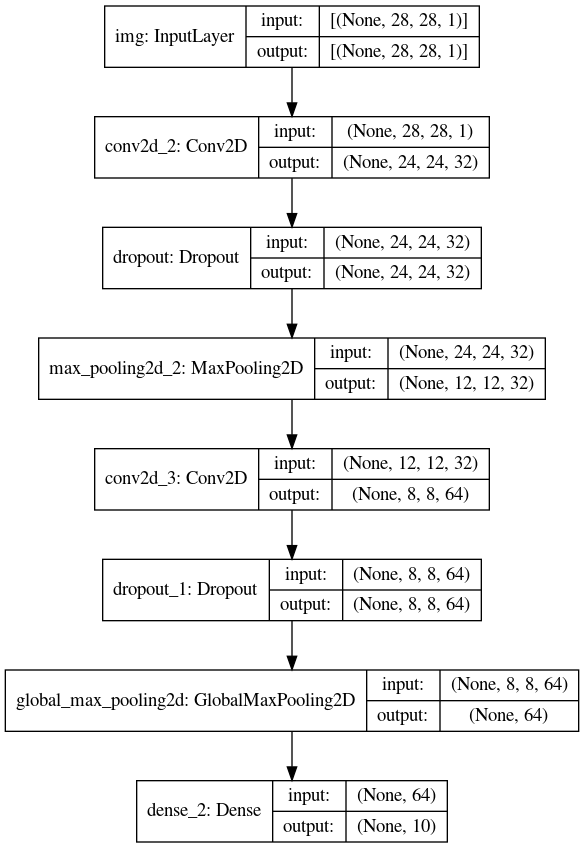

In [15]:
model_n.summary()
keras.utils.plot_model(model_n, 'multi_model_n.png', show_shapes=True)

In [14]:
try:
    del model_n
except:
    0
# LeNet
inputs_n = tf.keras.Input(shape=(28, 28, 1), name='img')
h1_n = layers.Conv2D(32, 5, activation='relu',padding='valid',kernel_initializer='glorot_normal')(inputs_n)
#h1_n = layers.BatchNormalization()(h1_n)
h1_n = layers.Dropout(0.5)(h1_n)
h1_n = layers.MaxPool2D(2)(h1_n)
h1_n = layers.Conv2D(64, 5, activation='relu',padding='valid',kernel_initializer='glorot_normal')(h1_n)
#h1_n = layers.BatchNormalization()(h1_n)
h1_n = layers.Dropout(0.5)(h1_n)

#h1_n = layers.MaxPool2D(2)(h1_n)
#h1_n = layers.Flatten()(h1_n)
#h2_n = layers.Dense(200,activation='relu')(h1_n)
#h2_n = layers.Dropout(0.5)(h2_n)
h2_n = layers.GlobalMaxPool2D()(h1_n)
#h2_n = layers.GlobalAvgPool2D()(h1_n)
outputs_n = layers.Dense(10, activation='softmax')(h2_n)

indices = np.arange(x_train.shape[0]+x_ntrain.shape[0]) 
np.random.shuffle(indices)
x_train_temp = np.concatenate((x_train,x_ntrain))[indices]
y_train_temp = np.concatenate((y_train,y_ntrain))[indices]
model_n = keras.Model(inputs=inputs_n, outputs=outputs_n, name='mnist_model')
model_n.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy', # 直接填api，后面会报错
             metrics=['accuracy'])


history_n = model_n.fit(x_train_temp, y_train_temp, batch_size=64, epochs=10,validation_split=0.14)
test_scores = model_n.evaluate(np.concatenate((x_test,x_ntest)), np.concatenate((y_test,y_ntest)), verbose=0)
print('test loss:', test_scores[0])
print('test acc:', test_scores[1])

Train on 53811 samples, validate on 8760 samples
Epoch 1/10
53811/53811 [==============================] - 9s 170us/sample - loss: 0.3656 - accuracy: 0.8881 - val_loss: 0.4190 - val_accuracy: 0.9640
Epoch 2/10
53811/53811 [==============================] - 9s 163us/sample - loss: 0.1351 - accuracy: 0.9568 - val_loss: 0.2893 - val_accuracy: 0.9731
Epoch 3/10
53811/53811 [==============================] - 9s 163us/sample - loss: 0.0983 - accuracy: 0.9692 - val_loss: 0.2469 - val_accuracy: 0.9784
Epoch 4/10
53811/53811 [==============================] - 9s 164us/sample - loss: 0.0802 - accuracy: 0.9755 - val_loss: 0.1657 - val_accuracy: 0.9858
Epoch 5/10
53811/53811 [==============================] - 9s 162us/sample - loss: 0.0694 - accuracy: 0.9779 - val_loss: 0.1830 - val_accuracy: 0.9846
Epoch 6/10
53811/53811 [==============================] - 9s 164us/sample - loss: 0.0628 - accuracy: 0.9797 - val_loss: 0.1466 - val_accuracy: 0.9884
Epoch 7/10
53811/53811 [===========================

In [175]:
model_n.evaluate(np.concatenate((x_train,x_test)), np.concatenate((y_train,y_test))),model.evaluate(np.concatenate((x_train,x_test)), np.concatenate((y_train,y_test)))

70000/70000 [==============================] - 4s 63us/sample - loss: 0.0173 - accuracy: 0.9950


([0.06745536081833499, 0.9938286], [0.017312237816724727, 0.995])

In [ ]:
model_n.evaluate(np.concatenate((x_ntest,x_test)), np.concatenate((y_ntest,y_test)))

In [12]:
# 新样本测试结果：依次为 新模型训练数据，新模型测试数据，旧模型训练数据，旧模型测试数据
model_n.evaluate(x_ntrain, y_ntrain)[1],model_n.evaluate(x_ntest, y_ntest)[1],
# model.evaluate(x_ntrain, y_ntrain)[1],
# model.evaluate(x_ntest, y_ntest)[1]]

429/429 [==============================] - ETA: 0s - loss: 0.3556 - accuracy: 1.00 - 0s 77us/sample - loss: 0.3583 - accuracy: 0.9814


(0.9875535, 0.981352)

In [15]:
for i in range(10):    
    print(((np.argmax(model_n.predict(x_new[y_new==i,:,:].reshape(-1,28,28,1)),axis=1)-i)==0).sum()/300)

1.0
0.9966666666666667
0.9666666666666667
0.9866666666666667
0.9966666666666667
0.97
0.9966666666666667
1.0
0.9866666666666667
0.9666666666666667


In [ ]:
plot_histroy(history_n)

In [11]:
model_n = tf.keras.models.load_model('model_num.h5')
#model_n = tf.keras.models.load_model('test99_model.h5')
#model_n.save('good_model.h5')

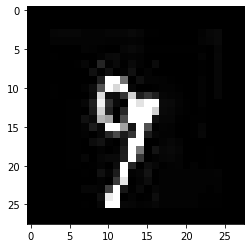

In [82]:
plt.imshow(x_new[599].reshape(28,28),cmap='gray')

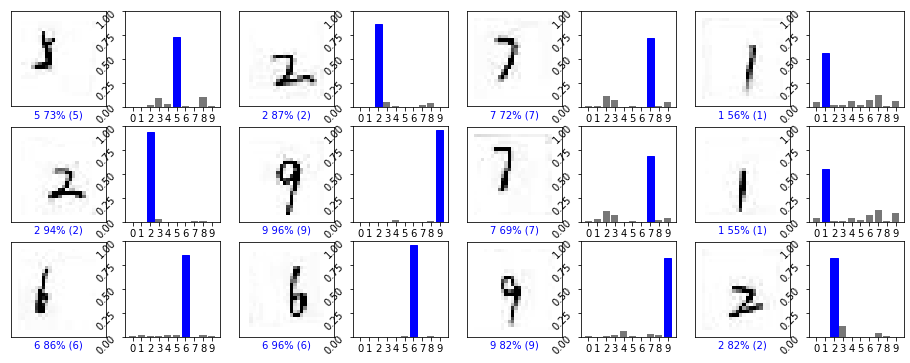

In [99]:
plot_all(3,4,model_n,x_ntrain,y_ntrain)

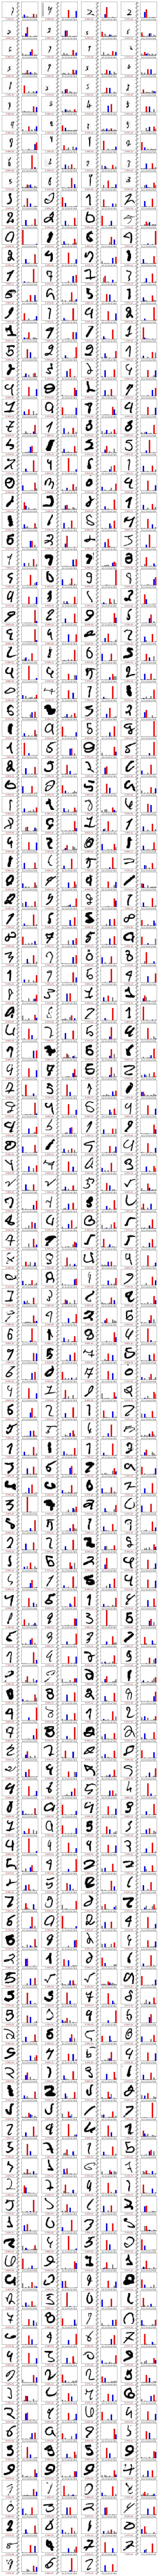

In [190]:
# 所有数据错误预测示范
x_all = np.concatenate((x_new, x_train, x_test))
y_all = np.concatenate((y_new, y_train, y_test))
all_pred = model_n.predict(x_all)
y_pred_all = np.argmax(all_pred,axis=1)
all_wrong_pred_idx = np.argwhere(np.logical_not(y_pred_all == y_all)).reshape(-1)
num_rows = np.ceil(all_wrong_pred_idx.shape[0]/4)
num_cols = 4
num_images = all_wrong_pred_idx.shape[0]
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(all_wrong_pred_idx[i], all_pred, y_all, x_all.reshape(-1,28,28))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(all_wrong_pred_idx[i], all_pred, y_all)

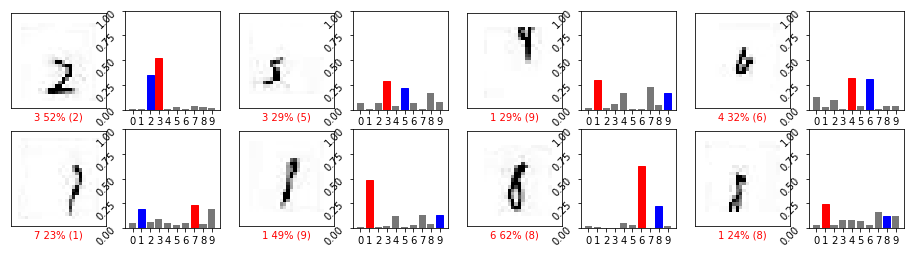

In [183]:
# 测试集中错误预测全部示范
n_pred = model_n.predict(x_ntest)
y_npred = np.argmax(n_pred,axis=1)
wrong_npred_idx = np.argwhere(np.logical_not(y_npred == y_ntest)).reshape(-1)
num_rows = np.ceil(wrong_npred_idx.shape[0]/4)
num_cols = 4
num_images = wrong_npred_idx.shape[0]
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(wrong_npred_idx[i], n_pred, y_ntest, x_ntest.reshape(-1,28,28))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(wrong_npred_idx[i], n_pred, y_ntest)

[[0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0]
 [2 0 0 0 0 0 0 0 0]]


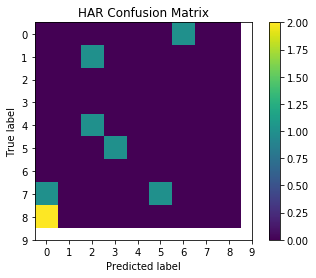

In [189]:
cm = confusion_matrix(y_ntest[wrong_npred_idx], y_npred[wrong_npred_idx],)
plot_confusion_matrix(cm, range(10), "HAR Confusion Matrix")
print(cm)

In [46]:
model_n.layers[0].output

<tf.Tensor 'img_1:0' shape=(None, 28, 28, 1) dtype=float32>

E:\Study\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
E:\Study\Anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


IndexError: too many indices for array

RuntimeError: libpng signaled error

<Figure size 1152x0 with 1 Axes>

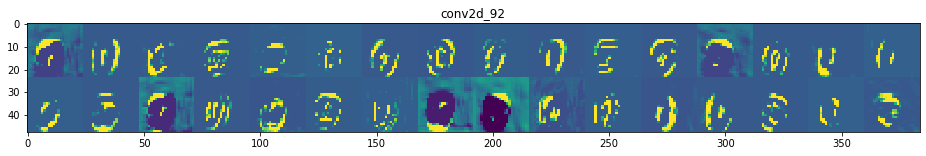

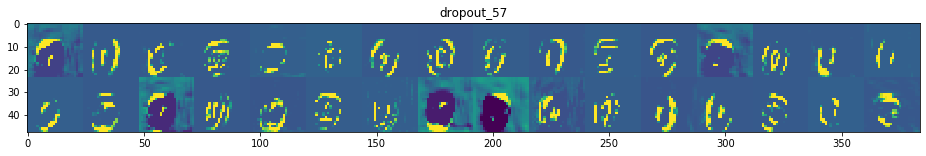

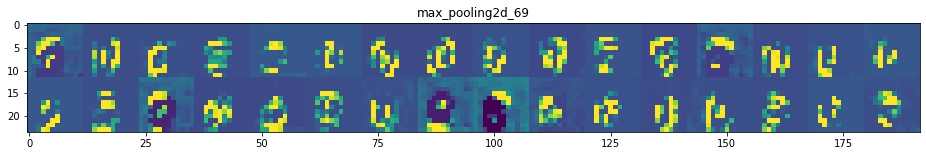

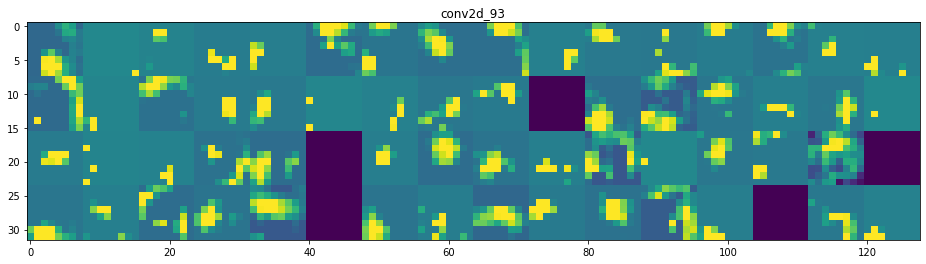

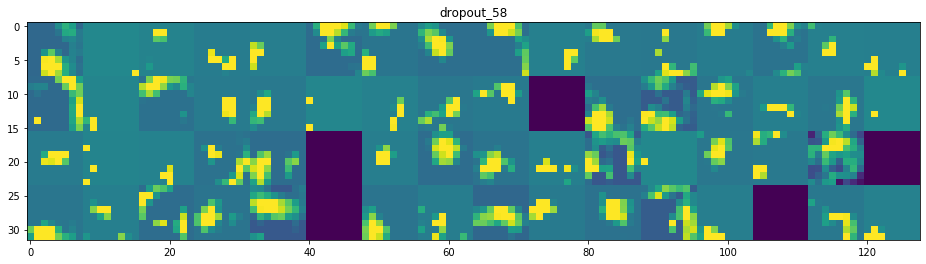

In [194]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model_n.layers[0:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model_n.layers[:8]]

# Creates a model that will return these outputs, given the model input:
activation_model = keras.models.Model(inputs=model_n.input, outputs=layer_outputs)
img_tensor = x_new[300].reshape(1,28,28,1)
activations = activation_model.predict(img_tensor) # predict每一层的 output

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
